### Project Title: A/B Testing Analysis for Ad Conversion
This project involves conducting an A/B testing analysis to evaluate the impact of ad changes on user conversions. The dataset includes features such as test group, total ads, most ads day, most ads hour, and conversion status. The goal is to analyze the results using statistical techniques, including hypothesis testing, and draw actionable insights regarding the effectiveness of the intervention.

In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Importing Dataset

df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:

df["test group"].value_counts()	

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [4]:
df["converted"].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

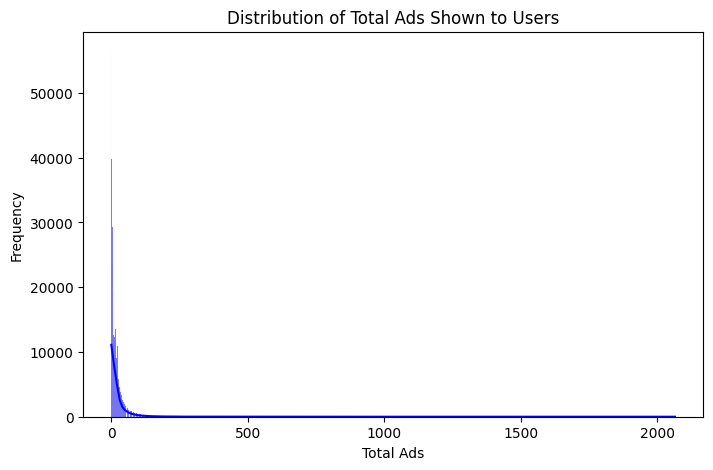

In [5]:
# Visualizing Total ADs

plt.figure(figsize=(8,5))
sns.histplot(df["total ads"], kde=True, color='blue')
plt.title("Distribution of Total Ads Shown to Users")
plt.xlabel("Total Ads")
plt.ylabel("Frequency")
plt.show()
             

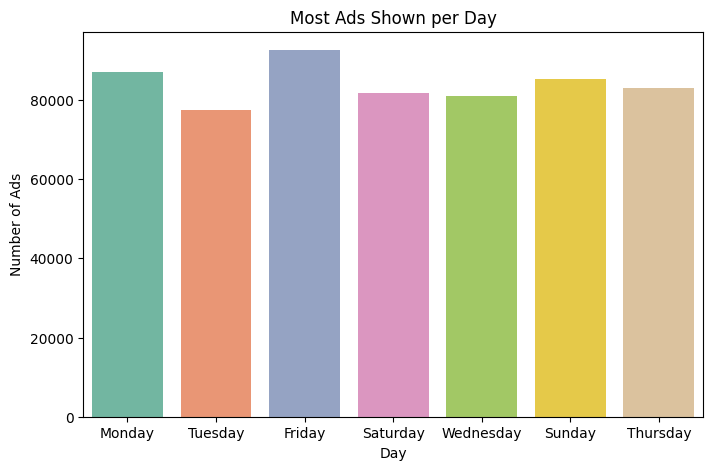

In [6]:
# Visualizing Most Ads Day

plt.figure(figsize=(8,5))
sns.countplot(x='most ads day', data=df, palette='Set2')
plt.title("Most Ads Shown per Day")
plt.xlabel("Day")
plt.ylabel("Number of Ads")
plt.show()

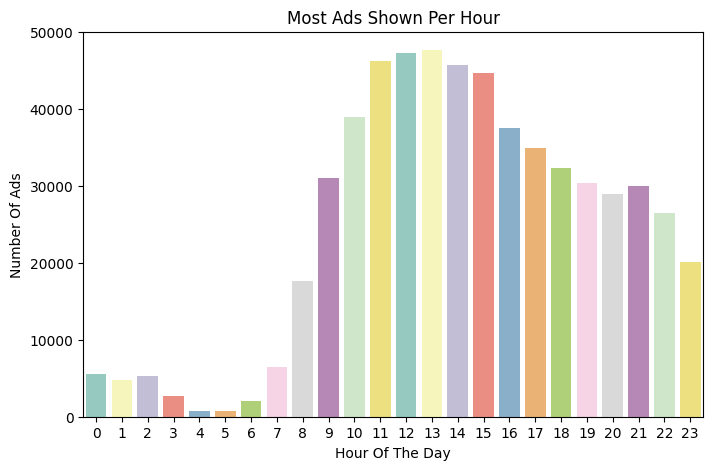

In [7]:
# Visualizing Most Ads Hours

plt.figure(figsize=(8,5))
sns.countplot(x="most ads hour", data=df, palette='Set3')
plt.title("Most Ads Shown Per Hour")
plt.xlabel("Hour Of The Day")
plt.ylabel("Number Of Ads")
plt.show()

In [8]:
# Keeping relevant columns

data = df[["user id", "test group",	"converted"]]
data

,user id,test group,converted
0,1069124,ad,False
1,1119715,ad,False
2,1144181,ad,False
3,1435133,ad,False
4,1015700,ad,False
...,...,...,...
588096,1278437,ad,False
588097,1327975,ad,False
588098,1038442,ad,False
588099,1496395,ad,False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user id     588101 non-null  int64 
 1   test group  588101 non-null  object
 2   converted   588101 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 9.5+ MB


In [10]:
# Checking for Duplicates

data.duplicated().sum()

0

In [11]:
# Calculating Conversion Rates

conversion_rates = data.groupby("test group")["converted"].mean()
print(f"Conversion Rates: \n{conversion_rates}") 

Conversion Rates: 
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [12]:
# Count of conversions & users

conversions = data.groupby("test group")["converted"].sum()
users = data.groupby("test group")["user id"].count()


#### Perform Z-Test to Check Statistical Significance

In [13]:
# Performing z_test

z_stat, p_value = proportions_ztest(conversions, users)
print(f"Z_Statistics: {z_stat}, P_Value: {p_value}")

Z_Statistics: 7.3700781265454145, P_Value: 1.7052807161559727e-13


#### Z-Statistic: A Z-statistic of 7.37 is very high, indicating that there is a substantial difference between the two groups (ad and psa).

#### P-Value: The p-value of 1.71e-13 is much smaller than the typical significance level of 0.05. This means that the difference between the two groups (ad vs psa) is statistically significant.

In [14]:
# Interpretation 

if p_value < 0.05:
    print("Statistically significant difference found. The 'ad' group performs better.")
else:
    print("No significant difference found between the groups.")


Statistically significant difference found. The 'ad' group performs better.


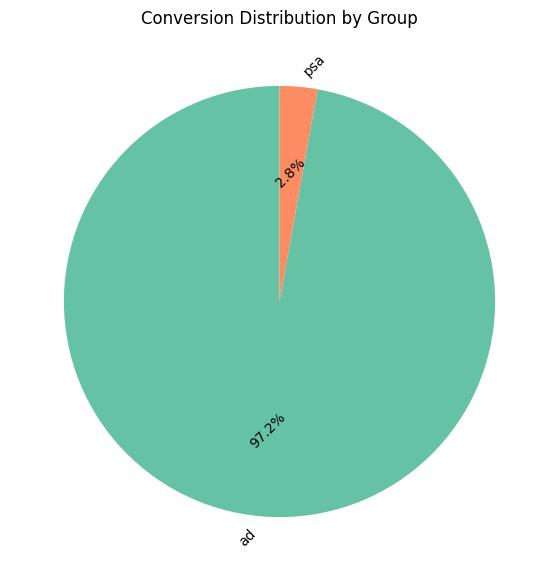

In [15]:
# Conversion Distribution (Pie Chart)

plt.figure(figsize=(7, 7))
plt.pie(conversions, labels=conversions.index, autopct='%1.1f%%', startangle=90, textprops={'rotation':45}, labeldistance=1.1, colors=['#66c2a5','#fc8d62'])
plt.title("Conversion Distribution by Group")
plt.ylabel('')
plt.show()

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [17]:
# Features for Analysis

feature = df[["test group", "converted", "total ads", "most ads day", "most ads hour"]]

In [18]:
# Preprocessing Cregorical data (Label Encoding 'test group', 'most ads day') 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
feature["test group"] = label_encoder.fit_transform(feature["test group"])
feature["most ads day"] = label_encoder.fit_transform(feature["most ads day"])

In [19]:
# Applying Standard Scaler

num_col = ["total ads", "most ads hour"]

# Initializing Standard Scaler
ss = StandardScaler()

# Applying Standard Scaler to the selected numerical columns
feature[num_col] = ss.fit_transform(feature[num_col])

feature.head(3)

,test group,converted,total ads,most ads day,most ads hour
0,0,False,2.406011,1,1.144025
1,0,False,1.559623,5,1.557708
2,0,False,-0.087404,5,0.730343


In [20]:
# Defining feature (x), target (y)

x = feature.drop("converted", axis=1)
y = feature["converted"].astype(int)


In [21]:
# Splitting data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Applying SMOTE

In [22]:

sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

### Applying Logistic Regression

In [23]:
# Training Logistic Regression

lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(x_train_sm, y_train_sm)


LogisticRegression(class_weight='balanced', random_state=42)

In [24]:
# Making Prediction

y_pred_lr = lr.predict(x_test)

In [25]:
# Calculating Accuracy, Confusion Matrix and Classification Report for Logistic Regression

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
lr_class_report = classification_report(y_test, y_pred_lr)


In [26]:
# Displaying Results 
 
print(f"Logistic Regression Accuracy: {lr_accuracy*100:.2f}%")
print(f"Confusion Matrix:\n{lr_conf_matrix}")
print(f"Classification Report:\n{lr_class_report}")


Logistic Regression Accuracy: 85.83%
Confusion Matrix:
[[98882 15750]
 [  921  2068]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    114632
           1       0.12      0.69      0.20      2989

    accuracy                           0.86    117621
   macro avg       0.55      0.78      0.56    117621
weighted avg       0.97      0.86      0.90    117621



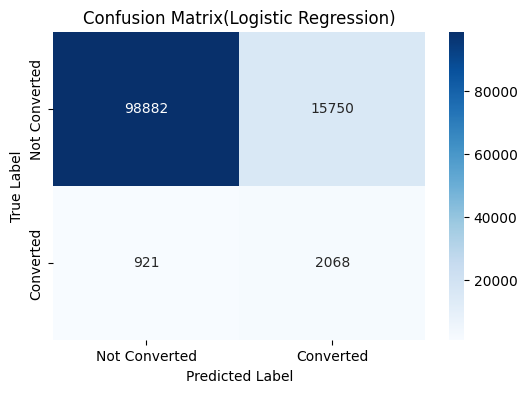

In [27]:
# Visualizing Confusion Matrix of Logistic Regression

plt.figure(figsize=(6, 4))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Converted", "Converted"], yticklabels=["Not Converted", "Converted"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix(Logistic Regression)")
plt.show()

### Applying RandomForestClassifier

In [28]:
# Training RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(x_train_sm, y_train_sm)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [29]:
# Making Predictions

y_pred_rf = rf.predict(x_test)

In [30]:
# Calculating Accuracy, Confusion Matrix and Classification Report for Random Forest

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)


In [31]:
# Displaying Results

print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}%")
print(f"Confusion Matrix:\n{rf_conf_matrix}")
print(f"Classification_Report:\n{rf_class_report}")


Random Forest Accuracy: 94.10%
Confusion Matrix:
[[110112   4520]
 [  2422    567]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    114632
           1       0.11      0.19      0.14      2989

    accuracy                           0.94    117621
   macro avg       0.54      0.58      0.55    117621
weighted avg       0.96      0.94      0.95    117621



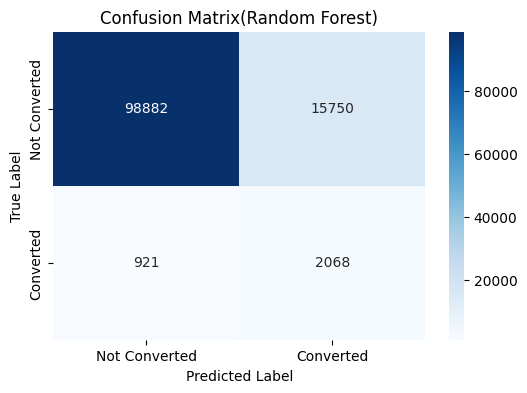

In [32]:
# Visualizing Confusion Matrix of Random Forest

plt.figure(figsize=(6, 4))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Converted", "Converted"], yticklabels=["Not Converted", "Converted"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix(Random Forest)")
plt.show()

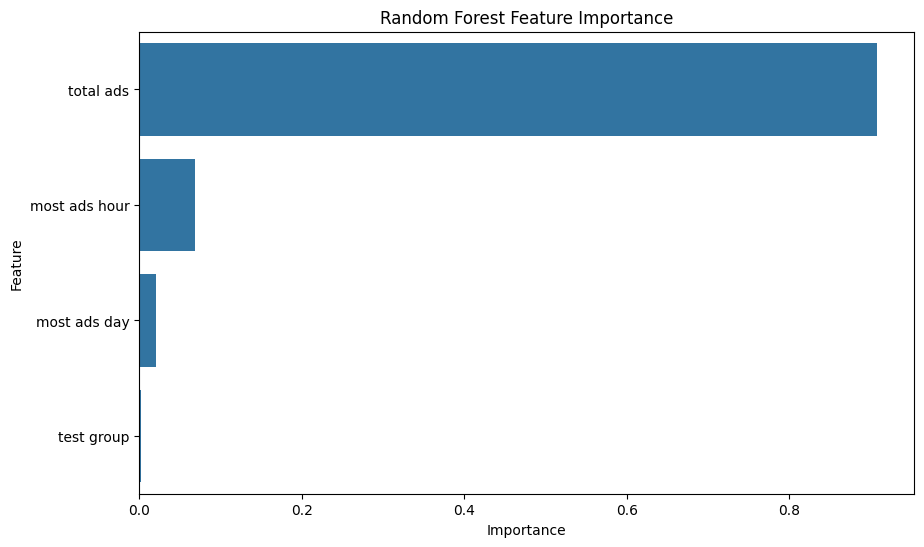

In [33]:
# Feature Importance

importances = rf.feature_importances_
features = x.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Random Forest Feature Importance")
plt.show()


### A/B Testing Insights:
#### Objective: Compare the conversion rates between two groups: 'ad' and 'psa.'
#### Results: The 'ad' group had a higher conversion rate (2.55%) compared to the 'psa' group (1.78%).
#### Statistical Significance: Using the Z-test, a statistically significant difference was found between the groups, favoring the 'ad' group for higher conversion rates.

### Machine Learning Insights:
#### Objective: Predict conversion likelihood using logistic regression and random forest models.
#### Data Preprocessing: Categorical columns ('test group,' 'most ads day') were label-encoded, and numerical columns ('total ads,' 'most ads hour') were scaled. SMOTE was applied to handle class imbalance.
#### Model Performance:
#### Logistic Regression: Achieved 85.83% accuracy, with higher recall for the minority class after handling imbalance.
#### Random Forest: Achieved 94.10% accuracy, performing well with balanced class weights.
### Key Findings: Random forest outperformed logistic regression in overall accuracy, but logistic regression provided better recall for the minority class (converted = 1).